# IMPORTING REQUIRED LIBRARIES

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# INSERT DATA

In [77]:
df = pd.read_csv('/content/Copy of Dataset .csv')

# DATA PROCESSING

In [78]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [79]:
df.shape

(9551, 21)

In [80]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [82]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [87]:
df['Cuisines'] = df['Cuisines'].apply(lambda x:x.replace(',',' '))

df['Cuisines'].unique()

array(['French  Japanese  Desserts', 'Japanese',
       'Seafood  Asian  Filipino  Indian', ..., 'Burger  Izgara',
       'World Cuisine  Patisserie  Cafe', 'Italian  World Cuisine'],
      dtype=object)

# DATA VISUALIZATION

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


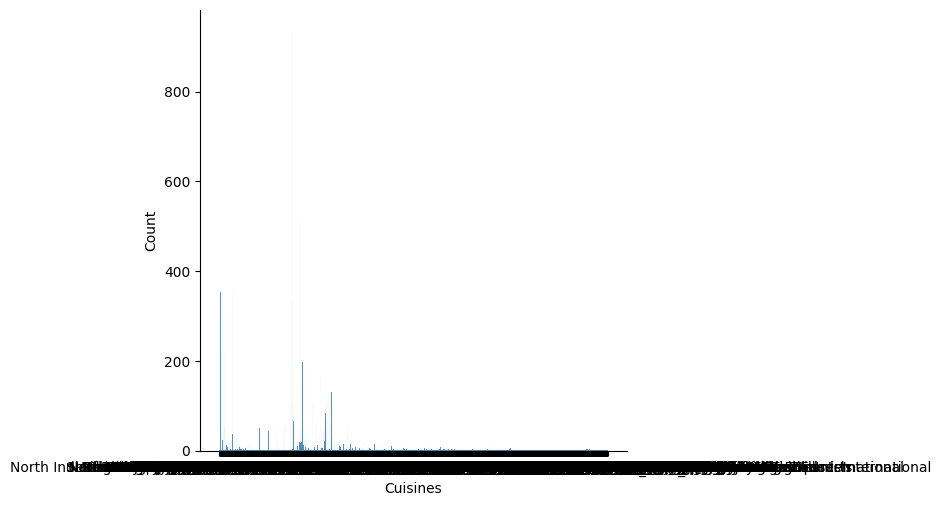

In [88]:
# Displot graph
sns.displot(df['Cuisines'])

<ipython-input-89-c2458a9f0c53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True) #heatmap


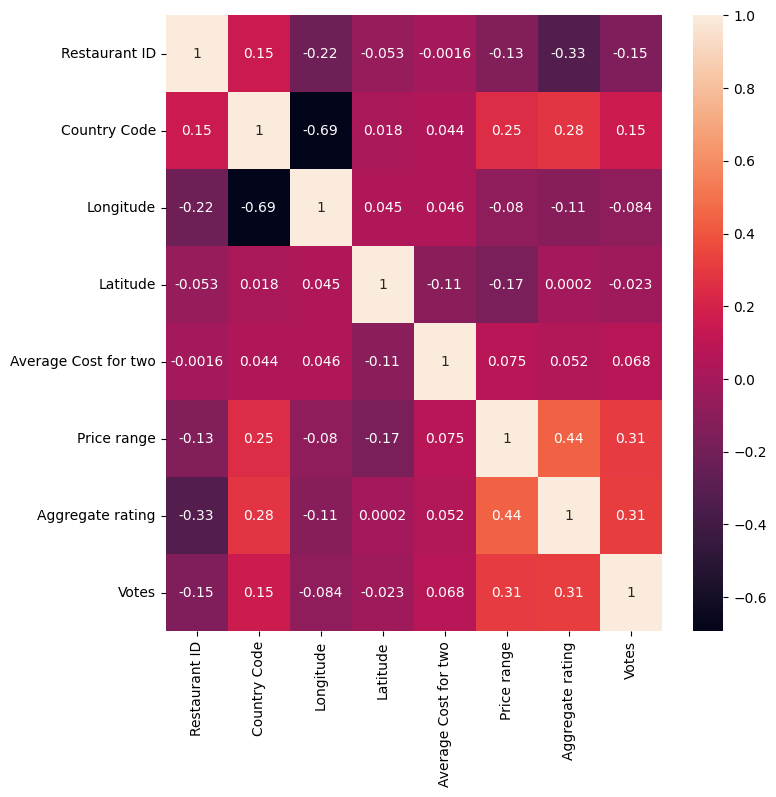

In [89]:
# Heat Map
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True) #heatmap
plt.show()

# IMPLEMENTING ML MODEL

In [90]:
y = df['Cuisines']

In [91]:
X = df['Votes']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
y_train

8177                                South Indian
6401                            Pizza  Fast Food
81                             Lebanese  Arabian
1332                                     Mughlai
9041    American  Fast Food  Salad  Healthy Food
                          ...                   
5743                       North Indian  Chinese
5200                                      Bihari
5399                                North Indian
869                                       Bakery
7279                                South Indian
Name: Cuisines, Length: 7633, dtype: object

In [95]:
y_test

7142     Chinese  Street Food
1860           Asian  Seafood
4425             North Indian
3219                  Italian
8308       Chinese  Fast Food
                ...          
5612             North Indian
4061                 Desserts
8746     Raw Meats  Fast Food
7678    North Indian  Chinese
4430                Fast Food
Name: Cuisines, Length: 1909, dtype: object

In [96]:
X_train

8177      6
6401    112
81       11
1332      0
9041     93
       ... 
5743      1
5200    308
5399      4
869       7
7279      3
Name: Votes, Length: 7633, dtype: int64

In [97]:
X_test

7142      2
1860    105
4425     55
3219    245
8308      0
       ... 
5612      0
4061      0
8746      0
7678      3
4430     91
Name: Votes, Length: 1909, dtype: int64

# APPLYING MODELS

1. Logistic regression




### **Logistic Regression**

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report





np. random. seed (42)
num_samples = 1000
num_features = 5
x = np.random.rand(num_samples, num_features)
y = np.random.randint(2, size=num_samples)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


logistic_model = LogisticRegression()
logistic_model.fit (x_train, y_train)
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average= 'weighted')
confusion = confusion_matrix(y_test, y_pred)

print ("Accuracy:", accuracy)
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1-score:", f1)
print ("Confusion Matrix: \n", confusion)

Accuracy: 0.45
Precision: 0.44440397001372617
Recall: 0.45
F1-score: 0.4427270877835419
Confusion Matrix: 
 [[32 65]
 [45 58]]
